1. Data Ingestion:

installing required packages 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


loading the data set to my jupyter notebook environment

In [8]:
data = pd.read_csv("weather_data.csv")
data.head(15)

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.0,10.0,Sunny
1,01/02/2023,New York,NaN,65.0,12.0,Cloudy
2,03-01-2023,New York,7.0,NaN,8.0,Rainy
3,NaN,London,8.0,70.0,15.0,Unknown
4,2023-01-02,London,6.0,75.0,20.0,Snowy
5,01/03/2023,London,NaN,80.0,18.0,Cloudy
6,2023-01-01,Tokyo,10.0,50.0,5.0,Sunny
7,01/02/2023,Tokyo,12.0,55.0,6.0,Cloudy
8,03-01-2023,Tokyo,NaN,60.0,7.0,Unknown
9,01-25-2023,New York,NaN,51.0,20.3,Sunny


2. Data Cleaning and Transformation:

In [9]:
# displaying the columns
print(data.columns)
# displaying the data types of each column
print(data.dtypes)

Index(['date', 'city', 'temperature_celsius', 'humidity_percent',
       'wind_speed_kph', 'weather_condition'],
      dtype='object')
date                    object
city                    object
temperature_celsius    float64
humidity_percent       float64
wind_speed_kph         float64
weather_condition       object
dtype: object


In [14]:
columns = data.columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
total_missing_values = missing_values.sum()
print(f'Total missing values from all the dataset = {total_missing_values}')

Missing values in each column:
date                   20
city                    0
temperature_celsius    58
humidity_percent       53
wind_speed_kph         45
weather_condition      16
dtype: int64
Total missing values from all the dataset = 192


Now lets handle the missing values in the data set

In [ ]:
# handling missing values with mean imputation for columns with numerical data and store it in a imputed dataset
imputed_data = data.copy()
for column in columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        mean_value = data[column].mean()
        imputed_data[column].fillna(mean_value, inplace=True)



In [18]:
imputed_data

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny
1,01/02/2023,New York,8.4,65.000000,12.000000,Cloudy
2,03-01-2023,New York,7.0,58.978723,8.000000,Rainy
3,NaN,London,8.0,70.000000,15.000000,Unknown
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy
...,...,...,...,...,...,...
95,01-01-2023,London,8.4,58.978723,14.352727,Rainy
96,09-01-2023,London,8.4,58.978723,14.352727,Rainy
97,2023-01-11,Tokyo,8.4,58.978723,14.352727,Sunny
98,15/01/2023,New York,8.4,41.000000,24.300000,NaN


converting date to date time fromat 

In [ ]:
# converting the datae column to datetime format
imputed_data['date'] = pd.to_datetime(imputed_data['date'], dayfirst= True errors= 'coerce')
imputed_data

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny
1,2023-02-01,New York,8.4,65.000000,12.000000,Cloudy
2,2023-01-03,New York,7.0,58.978723,8.000000,Rainy
3,NaT,London,8.0,70.000000,15.000000,Unknown
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy
...,...,...,...,...,...,...
95,2023-01-01,London,8.4,58.978723,14.352727,Rainy
96,2023-01-09,London,8.4,58.978723,14.352727,Rainy
97,2023-01-11,Tokyo,8.4,58.978723,14.352727,Sunny
98,2023-01-15,New York,8.4,41.000000,24.300000,NaN


In [49]:
# before storing frahnheit values in the new col lets assign the value to 0 since we are going to sotre numeric values
imputed_data[' temperature_fahrenheit'] = 0
imputed_data[' temperature_fahrenheit'] = data['temperature_celsius'] * 9/5 + 32
print(imputed_data[' temperature_fahrenheit'].head(10))

0    41.00
1    47.12
2    44.60
3    46.40
4    42.80
5    47.12
6    50.00
7    53.60
8    47.12
9    47.12
Name:  temperature_fahrenheit, dtype: float64


In [64]:
# now lets drop where weather condition is null or unknown
# for na values 
cleaned_data = imputed_data.dropna(subset=['weather_condition'])
# for unknown values
cleaned_weather_data = cleaned_data[~cleaned_data['weather_condition'].str.contains('Unknown', case=False)]
cleaned_weather_data

,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny,41.00
1,2023-02-01,New York,8.4,65.000000,12.000000,Cloudy,47.12
2,2023-01-03,New York,7.0,58.978723,8.000000,Rainy,44.60
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy,42.80
5,2023-03-01,London,8.4,80.000000,18.000000,Cloudy,47.12
6,2023-01-01,Tokyo,10.0,50.000000,5.000000,Sunny,50.00
7,2023-02-01,Tokyo,12.0,55.000000,6.000000,Cloudy,53.60
9,2023-01-25,New York,8.4,51.000000,20.300000,Sunny,47.12
12,2023-07-01,New York,8.4,58.978723,17.900000,Snowy,47.12
14,2023-01-15,London,8.4,56.000000,14.352727,RAINY,47.12


In [ ]:
cleaned_weather_data.isnull().any(axis=1)
cleaned_weather_data.head(10) # only displayes missing values from the date col so no need to drop rows since other columns are not affectedand no country data is missing


,date,city,temperature_celsius,humidity_percent,wind_speed_kph,weather_condition,temperature_fahrenheit
0,2023-01-01,New York,5.0,60.000000,10.000000,Sunny,41.00
1,2023-02-01,New York,8.4,65.000000,12.000000,Cloudy,47.12
2,2023-01-03,New York,7.0,58.978723,8.000000,Rainy,44.60
4,2023-01-02,London,6.0,75.000000,20.000000,Snowy,42.80
5,2023-03-01,London,8.4,80.000000,18.000000,Cloudy,47.12
6,2023-01-01,Tokyo,10.0,50.000000,5.000000,Sunny,50.00
7,2023-02-01,Tokyo,12.0,55.000000,6.000000,Cloudy,53.60
9,2023-01-25,New York,8.4,51.000000,20.300000,Sunny,47.12
12,2023-07-01,New York,8.4,58.978723,17.900000,Snowy,47.12
14,2023-01-15,London,8.4,56.000000,14.352727,RAINY,47.12


# The bonous  - Bonus (Optional): Create a bar chart of average temperature per city using 
# matplotlib or Seaborn 

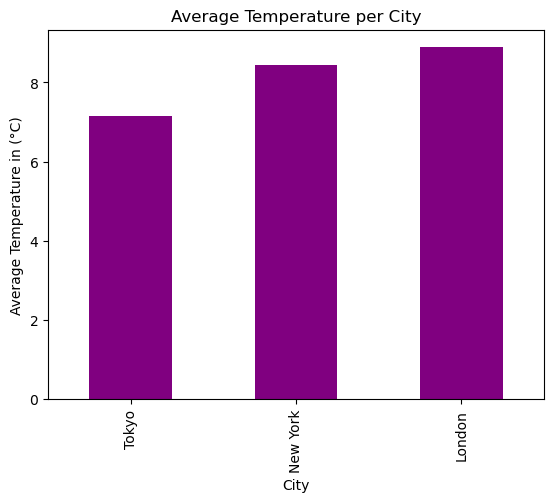

In [79]:
#Create a bar chart of average temperature per city using Matplotlib
average_temprature_per_city = cleaned_weather_data.groupby("city")['temperature_celsius'].mean().sort_values()
average_temprature_per_city.plot(kind='bar', color='purple')
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Average Temperature in (°C)')

plt.show()


In [ ]:
# clead csv file.

cleaned_weather_data.to_csv("cleaned_weather_data.csv", index=False)

# text file that contains the top 5 cities with high temprature
top_5 = cleaned_weather_data.groupby("city")['temperature_celsius'].mean().nlargest(5)
with open("top_5.txt", "w") as file:
    file.write("Top 5 Cities with high temprature: \n")
    for i in top_5.items():
        file.write(f'{i}\n')